In [7]:
import pandas as pd
import numpy as np
import librosa
import matplotlib.pylab as plt
import seaborn as sns
from itertools import cycle

from pydub import AudioSegment
import sounddevice as sd
import time

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

V tejto časti importujeme potrebné knižnice, ako sú Pandas, NumPy, Librosa, Matplotlib a Seaborn. Potom nastavíme tému a farebnú paletu pre grafické zobrazenia.

In [8]:
def dbAmpChange(input, dBChange):
    G = 10 ** (dBChange/20) 
    output = G * input
    return output

V tejto časti definujeme funkciu, ktorá sa použije na zmenu amplitúdy vstupného signálu v decibeloch.

In [9]:
x, Fs = librosa.load("../git/sounds/AcGtr.wav")

N = len(x)

offSet1 = 0
out1 = x + offSet1 

offSet2 = 1
out2 = x + offSet2 

V tejto časti načítame súbor .wav a určíme jeho vzorkovaciu frekvenciu. Potom určíme dĺžku vstupného signálu a vykonáme jednosmerný posun. Vytvoríme dve verzie posunutého signálu, jednu s posunom 0 a druhú s posunom 1.


In [10]:
dB1 = 3
dB2 = -6
y1 = dbAmpChange(out1, dB1)
y2 = dbAmpChange(out2, dB2)

Tu definujeme premenné, ktoré obsahujú hodnotu zmeny amplitúdy v decibeloch, a vypočítame zmeny amplitúdy predtým prijatých signálov s posunom 

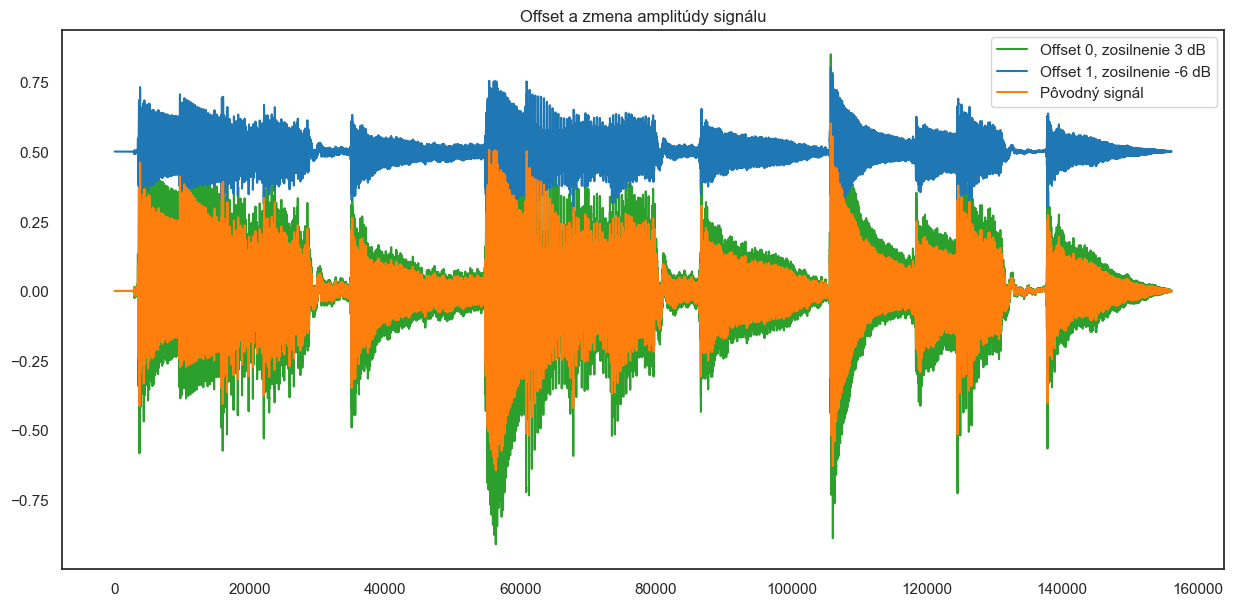

In [11]:
plt.figure(figsize=(15, 7))
plt.plot(y1, label="Offset 0, zosilnenie 3 dB", color=color_pal[2])
plt.plot(y2, label="Offset 1, zosilnenie -6 dB", color=color_pal[0])
plt.plot(x, label="Pôvodný signál", color=color_pal[1])
plt.title('Offset a zmena amplitúdy signálu')
plt.legend()
plt.show()


Tento kód zobrazuje grafy troch signálov: pôvodného signálu x (modra farba), signálu posunutého o konštantu offSet1 a zmeneného v amplitúde o dB1 decibelov, ktorý je uložený v premennej y1(oranžová farba), a signálu posunutého o konštantu offSet2 a zmeneného v amplitúde o dB2 decibelov, ktorý je uložený v premennej y2(zelená farba). Grafy sa zobrazujú pomocou metódy plot z knižnice Pandas, ktorá používa parametre uvedené v zátvorkách (veľkosť grafu, šírka čiary grafu, názov atď.). V poslednom riadku funkcie plt.show() sa zobrazí obrázok grafu.

In [6]:
#Nacitanie file a vypocet trvalosti audia
sound = AudioSegment.from_file("../git/sounds/AcGtr.wav")
sound.duration_seconds == (len(sound) / 1000.0)
seconds_duration = round((sound.duration_seconds % 60),3)
                         
sd.play(y1, Fs)
time.sleep(seconds_duration + 1)
sd.play(y2, Fs)